### **`Cat vs Dog image classification`**

<p align="center"/>
  <img src="https://miro.medium.com/max/2400/1*EvMbMNRHm_aOf1n4tDO1Xg.jpeg" width="50%"/>
</p>


### **`Load data`**

Download the dataset by visiting the [Dogs vs. Cats Data page](https://www.kaggle.com/c/dogs-vs-cats/data) and click the “Download All” button.

After that extract the downloaded folder and also extract train and test1 dataset.

<hr/>

### **`Folder structure`**

<hr/>

  📁 train <br/>
  📁 test1 <br/>
  📁 dog_vs_cat.zip <br/>
  📄 Manipulation.py <br/>

Now Execute [Manipulation.py]() , After excuting manipulation.py . Now folder structure will changed
<hr/>

### **`Folder structure`**

<hr/>

  📁 train <br/>
  📁 test1 <br/>
  📁 dog_vs_cat.zip <br/>
  📄 Manipulation.py <br/>
  📁 dataset_dog_vs_cat <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
📁 training <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
📁 validation <br/>

Now, Rename `test1` dataset to `testing` and move this folder to dataset_dog_vs_cat folder.

<hr/>

### **`Folder structure`**

<hr/>

  📁 train <br/>
  📁 dog_vs_cat.zip <br/>
  📄 Manipulation.py <br/>
  📁 dataset_dog_vs_cat <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
📁 training <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
📁 validation <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
📁 testing <br/>

      
      |__ training 
        |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
        |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]

      |__ validation
        |______ cats: [cat.1.jpg, cat.120.jpg, cat.2002.jpg ....]
        |______ dogs: [dog.2.jpg, dog.130.jpg, dog.1345.jpg ...]
      
      |__ testing
        |______ [1.jpg, 2.jpg, 3.jpg ....]

As i'm excuting a code in Colab notebook , so i uploaded zip of dataset_dog_vs_cat in drive and extract it from thier itself.

Now all folder are present in local colab disk storage , so now i can easily access.


In [0]:
ls

sample_data/


In [1]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/Deep-learning-for-computer-vision/Cat-vs-Dog-classification/Dataset"

Cat-vs-Dog-Classification.ipynb  dataset_dogs_vs_cats.zip  train.zip


### **`Extract Dataset`**

In [3]:
print("[INFO] Extracting Dataset .....")
!unzip -q "/content/drive/My Drive/Colab Notebooks/Deep-learning-for-computer-vision/Cat-vs-Dog-classification/Dataset/dataset_dogs_vs_cats.zip"


[INFO] Extracting Dataset .....


In [4]:
print("[INFO] Extracting Original training Dataset from kaggle.....")
!unzip -q "/content/drive/My Drive/Colab Notebooks/Deep-learning-for-computer-vision/Cat-vs-Dog-classification/Dataset/train.zip"


[INFO] Extracting Original training Dataset from kaggle.....


### **`Import package`**

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **`Plot Cat image`**

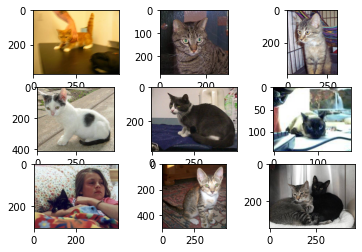

In [7]:
# plot cat photos from the dogs vs cats dataset
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

### **`Plot dog image`**

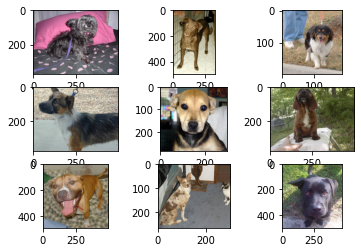

In [8]:
# plot cat photos from the dogs vs cats dataset
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

### **`Preprocessing and visualization`**

original dataset contain 25000 images , 12500 images for each label i.e. for cat and dog. 

In [9]:
import os
import pandas as pd

train_folder = 'train/'

categories = []
for filename in os.listdir(train_folder):
  '''
      label cat as 0 and dog as 1
  '''
  category = filename.split('.')[0]
  if category == 'cat':
    categories.append(0)
  else:
    categories.append(1)

image_file =  os.listdir(train_folder)
df = pd.DataFrame({
    'filename':image_file,
    'category':categories
})

df.head(5)

,filename,category
0,cat.7086.jpg,0
1,cat.467.jpg,0
2,cat.9847.jpg,0
3,cat.4670.jpg,0
4,cat.9499.jpg,0


In [10]:
df.tail(5)

,filename,category
24995,cat.8750.jpg,0
24996,dog.3838.jpg,1
24997,cat.884.jpg,0
24998,dog.5818.jpg,1
24999,dog.9355.jpg,1


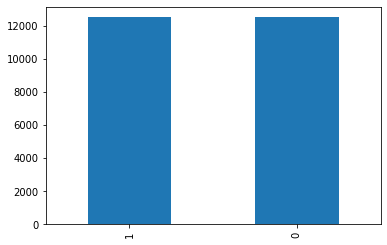

In [11]:
df.category.value_counts().plot.bar()
plt.show()

### **`Standard Directories`**
---

we can load the images progressively using the Keras ImageDataGenerator class and flow_from_directory() API. This will be slower to execute but will run on more machines.

Download the train dataset and test dataset, extract them into 2 different folders named as “train” and “test”. The train folder should contain ‘n’ folders each containing images of respective classes. For example, In the Dog vs Cats data set, the train folder should have 2 folders, namely “Dog” and “Cats” containing respective images inside them.

Create a validation set, often you have to manually create a validation data by sampling images from the train folder (you can either sample randomly or in the order your problem needs the data to be fed) and moving them to a new folder named “valid”. If the validation set is already provided, you could use them instead of creating them manually.

<p align="center"/>
<img src="https://miro.medium.com/max/1400/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg" width="60%"/>
<p>

Reference:

* [Machinelearningmastery - Cats vs Dog image classification](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)

* [Medium - Image generators and flow from directory](https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

* [Tensorflow - Image classification](https://www.tensorflow.org/tutorials/images/classification)

### **`Preprocessing and visualization after seperating dataset into training and validation`**


In [0]:
training_folder = os.path.join('dataset_dogs_vs_cats/training')
validation_folder = os.path.join('dataset_dogs_vs_cats/validation')
testing_folder = os.path.join('dataset_dogs_vs_cats/testing')

In [13]:
cats_training = len([i for i in os.listdir(training_folder+'/cats')])
dogs_training = len([i for i in os.listdir(training_folder+'/dogs')])
cats_validation = len([i for i in os.listdir(validation_folder+'/cats')])
dogs_validation = len([i for i in os.listdir(validation_folder+'/dogs')])


print("cats training dataset: {}".format(cats_training))
print("dogs training dataset: {}".format(dogs_training))
print("================================================")
print("cats validation dataset: {}".format(cats_validation))
print("dogs validation dataset: {}".format(dogs_validation))
print("================================================")
print("Total images for cat: {}".format(cats_training+cats_validation))
print("Total images for dog: {}".format(dogs_training+dogs_validation))
print("================================================")

testing_image = len([i for i in os.listdir(testing_folder)])
print("Total tesing images : {}".format(testing_image))


cats training dataset: 9323
dogs training dataset: 9374
cats validation dataset: 3177
dogs validation dataset: 3126
Total images for cat: 12500
Total images for dog: 12500
Total tesing images : 12500


In [14]:
test_filename = []
for i in os.listdir(testing_folder):
  test_filename.append(i)

testing_df = pd.DataFrame({'testing_file':test_filename})
testing_df.head(5)

,testing_file
0,9929.jpg
1,3785.jpg
2,6490.jpg
3,7671.jpg
4,7336.jpg


In [15]:
test_filename[4]

'7336.jpg'

In [16]:
testing_df.count()

testing_file    12500
dtype: int64

### **`Load image data with augmentation`**

### **Data augmentation**

Overfitting generally occurs when there are a small number of training examples. One way to fix this problem is to augment the dataset so that it has a sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples using random transformations that yield believable-looking images. The goal is the model will never see the exact same picture twice during training. This helps expose the model to more aspects of the data and generalize better.

Implement this in **`tf.keras`** using the **`ImageDataGenerator class`**. Pass different transformations to the dataset and it will take care of applying it during the training process.

After applying this operation , it is not like that the number of dataset or number of image in training would increase. it's same as actual dataset size.

But the random transformation (zooming, scaling, horizontal , vertical shift) are applied on the each training image , so original image present in training would get transformed into new image and every time (i.e. each epoch) random transformation are applied to original image. so model will not see same image again and again.




    train_generator = train_datagen.flow_from_directory(
        directory=r"./train/",
        target_size=(224, 224),
        color_mode="rgb",
        batch_size=32,
        class_mode="categorical",
        shuffle=True,
        seed=42
    )
The **`directory`** must be set to the path where your ‘n’ classes of folders are present.<br/>

The **`target_size`** is the size of your input images, every image will be resized to this size.<br/>

**`color_mode`**: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.<br/>

**`batch_size`**: No. of images to be yielded from the generator per batch.<br/>

**`class_mode`**: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.<br/>

**`shuffle`**: Set True if you want to shuffle the order of the image that is being yielded, else set False.<br/>
**`seed`**: Random seed for applying random image augmentation and shuffling the order of the image.



In [18]:
# Define training data augmentation pipeline
train_datagen = ImageDataGenerator( rescale=1.0/255 , 
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                  )
# load training data
train_generator = train_datagen.flow_from_directory(
                                                        training_folder,
                                                        batch_size=128,
                                                        class_mode='binary',
                                                        target_size=(150,150),
                                                        shuffle=True

                                                    )
# Define validation data augmentation pipeline
validation_datagen = ImageDataGenerator( rescale=1.0/255 )

# load validationing data
validation_generator = validation_datagen.flow_from_directory(
                                                        validation_folder,
                                                        batch_size=128,
                                                        class_mode='binary',
                                                        target_size=(150,150),
                                                        shuffle=True
                                                    )                                    

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [0]:
'''
Take one sample image from the training examples and repeat it five times
so that the augmentation is applied to the same image five times.

As we are choosing the sample randomly by changing last element of 3D array
'''

augmented_cat_images = [train_generator[0][0][1] for i in range(5)]
augmented_dog_images = [train_generator[0][0][5] for i in range(5)]


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


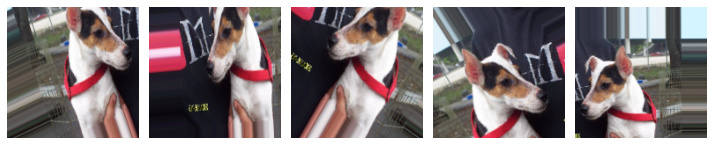

In [28]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images

plotImages(augmented_dog_images)

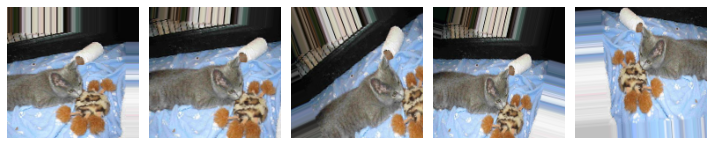

In [31]:
plotImages(augmented_cat_images)

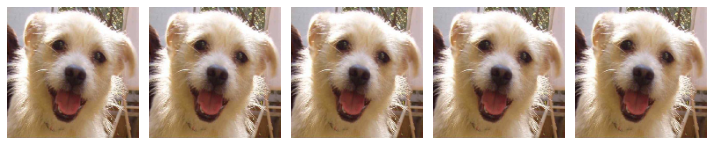

In [32]:
augmented_dog_images = [validation_generator[0][0][2] for i in range(5)]
plotImages(augmented_dog_images)

### **`Design architecture of model and Compile Model`**

<p align="center"/>
    <img src="https://i.imgur.com/ebkMGGu.jpg" width="80%"/>
</p>

Reference:
* [https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification](https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification)

In [0]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_CHANNELS=3

`Input Layer`: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.

`Conv Layer`: This layer will extract features from image.

`Pooling Layer`: This layerreduce the spatial volume of input image after convolution.

`Fully Connected Layer`: It connect the network from a layer to another layer.

`Output Layer`: It is the predicted values layer.

#### **Forms of regularization** 

1. Data augmentation
2. Dropout
3. Batch norm
4. Early stopping
5. use of L1 and L2 regularization (also known as "weight decay")
6. fine-tuning one more convolutional block (alongside greater regularization)

#### **Sequential API vs Functional API**

<p align="center">
  <img src="https://i.stack.imgur.com/WCess.png" width="40%">
</p>

1. Keras Sequential Models

  The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

  The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations.

  For example, it is not straightforward to define models that may have multiple different input sources, produce multiple output destinations or models that re-use layers.


2. Keras Functional Models

  The Keras functional API provides a more flexible way for defining models.

  It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

  Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model.

Reference : 

[https://machinelearningmastery.com/keras-functional-api-deep-learning/](https://machinelearningmastery.com/keras-functional-api-deep-learning/)

In [34]:
model = Sequential()

# Add Conv layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add Conv layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add Conv layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add Conv layer 4
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the result to feed into DNN (Deep neural network)
model.add(Flatten())

# Add Dense layer (Fully connected layer )
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# It contain only 1 output neuron , 0 for 'Cat' label and 1 for 'Dog' label
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model 
# Specify the training configuration (optimizer, loss, metrics)

adam = tf.keras.optimizers.Adam(      learning_rate=0.001, 
                                        beta_1=0.9, 
                                        beta_2=0.999,
                                        epsilon=None,
                                        decay=0.0,
                                        amsgrad=False)

print("[INFO] Compiling model ...")
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

'''

Number of parameters for various layer decided based on :

((width of kernel * height of kernel * number of filters in the previous layer (channel) ) + 1) * number of filters in present layer)

In first conv layer : ((3 * 3 * 3)+1) * 32) = 28*32 = 896 Parameters
'''

# Model Summary
model.summary()

[INFO] Compiling model ...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 

In [0]:
from warnings import filterwarnings
filterwarnings('ignore')

## **`Callbacks`**

References:

* [https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)

* [https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

* [https://machinelearningmastery.com/check-point-deep-learning-models-keras/](https://machinelearningmastery.com/check-point-deep-learning-models-keras/)


#### **`Early stoping`**
A problem with training neural networks is in the choice of the number of training epochs to use.

Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.

The EarlyStopping callback is configured when instantiated via arguments.

The “monitor” allows you to specify the performance measure to monitor in order to end training

```python
 es = EarlyStopping(monitor='val_loss')
```
Based on the choice of performance measure, the “mode” argument will need to be specified as whether the objective of the chosen metric is to increase (maximize or ‘max‘) or to decrease (minimize or ‘min‘).

For example, we would seek a minimum for validation loss and a minimum for validation mean squared error, whereas we would seek a maximum for validation accuracy.

```python
es = EarlyStopping(monitor='val_loss', mode='min')
```
By default, mode is set to ‘auto‘ and knows that you want to minimize loss or maximize accuracy.

By setting `verbose` 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch. verbose=0 will show you nothing

To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number.

```python
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
``` 
Often, the first sign of no further improvement may not be the best time to stop training. This is because the model may coast into a plateau of no improvement or even get slightly worse before getting much better.

`patience` : Number of epochs with no improvement after which training will be stopped.

In [0]:
# Package
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [0]:
'''
Early Stop

To prevent over fitting we will stop the learning after 5 epochs and if val_loss value not decreased
'''
earlystop = EarlyStopping(monitor='val_loss',patience=5)


#### **`Learning Rate Reduction`**

We will reduce the learning rate when then accuracy not increase for 3 steps

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001
                                            ) 

#### **`checkpoint`**

It is an approach where a snapshot of the state of the system is taken in case of system failure. If there is a problem, not all is lost. The checkpoint may be used directly, or used as the starting point for a new run, picking up where it left off.

When training deep learning models, the checkpoint is the weights of the model. These weights can be used to make predictions as is, or used as the basis for ongoing training.

The Keras library provides a checkpointing capability by a callback API.

The ModelCheckpoint callback class allows you to define where to checkpoint the model weights, how the file should named and under what circumstances to make a checkpoint of the model.

The API allows you to specify which metric to monitor, such as loss or accuracy on the training or validation dataset. You can specify whether to look for an improvement in maximizing or minimizing the score. Finally, the filename that you use to store the weights can include variables like the epoch number or metric.

The ModelCheckpoint can then be passed to the training process when calling the fit() function on the model.

In [0]:
filepath="cats_vs_dogs_checkpoint_weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [0]:
callbacks = [earlystop,learning_rate_reduction,checkpoint] 

In [41]:
print(len(train_generator))
print(len(validation_generator))

147
50


In [42]:
# initilize training config 
# batch size we have already consider
epochs = 20

# Run training
print("[INFO] Training ...")

history = model.fit(train_generator, steps_per_epoch=len(train_generator),
                    validation_data = validation_generator,
                    epochs=epochs,verbose=1,validation_steps = len(validation_generator),
                    callbacks=callbacks)

# save model
'''
  Save Final Model
  A final model is typically fit on all available data, such as the combination of all train and test dataset.

  Note: saving and loading a Keras model requires that the h5py library is installed on your workstation.

  The h5py package is a Pythonic interface to the HDF5 binary data format.
  It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy.
'''

model.save('Cat_vs_Dog_image_classification.h5')

[INFO] Training ...
Epoch 1/20
147/147 [==============================] - ETA: 0s - loss: 0.7376 - accuracy: 0.6137
Epoch 00001: val_accuracy improved from -inf to 0.50436, saving model to cats_vs_dogs_checkpoint_weights.best.hdf5
147/147 [==============================] - 1351s 9s/step - loss: 0.7376 - accuracy: 0.6137 - val_loss: 3.0425 - val_accuracy: 0.5044 - lr: 0.0010
Epoch 2/20
147/147 [==============================] - ETA: 0s - loss: 0.6405 - accuracy: 0.6620
Epoch 00002: val_accuracy improved from 0.50436 to 0.52562, saving model to cats_vs_dogs_checkpoint_weights.best.hdf5
147/147 [==============================] - 1343s 9s/step - loss: 0.6405 - accuracy: 0.6620 - val_loss: 1.1234 - val_accuracy: 0.5256 - lr: 0.0010
Epoch 3/20
147/147 [==============================] - ETA: 0s - loss: 0.5678 - accuracy: 0.7037
Epoch 00003: val_accuracy improved from 0.52562 to 0.57370, saving model to cats_vs_dogs_checkpoint_weights.best.hdf5
147/147 [==============================] - 1345s 

It takes approximately 5 hours for training , it stop early because we set patience = 5 for val_loss

In [43]:
print('\nhistory dict:', history.history.keys())


history dict: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


##**Visualization**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']                         
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
lr = history.history['lr']

epochs = range(len(acc))        ## get number of epochs

##**Plot training and validation accuracy per epoch**

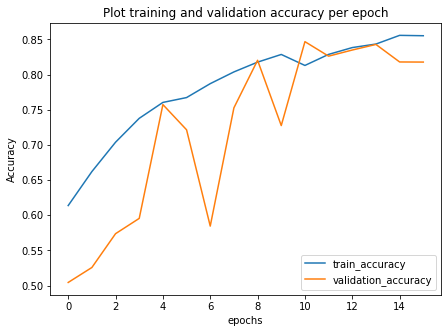

In [46]:
'''
  weird shape because we trained on less number of epoch
'''
plt.figure(figsize=(7,5))
plt.plot(epochs, acc,label='train_accuracy')
plt.plot(epochs, val_acc,label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.title('Plot training and validation accuracy per epoch')
plt.show()


##**Plot training and validation loss per epoch**


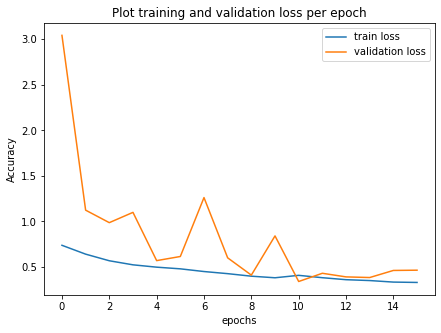

In [47]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss,label='train loss')
plt.plot(epochs, val_loss,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.title('Plot training and validation loss per epoch')
plt.show()

##**Show accuracy on the testing data**

In [48]:
'''
The evaluate_model() function below implements these behaviors,
taking the training dataset as arguments and returning a list of
accuracy scores and training histories that can be later summarized.

'''
print("[INFO] Evaluating ... ")
(loss,accuracy) = model.evaluate(validation_generator,steps=len(validation_generator),verbose=1)
print("[INFO] accuracy : {:.2f}%".format(accuracy*100))

[INFO] Evaluating ... 
50/50 [==============================] - 101s 2s/step - loss: 0.4643 - accuracy: 0.8177
[INFO] accuracy : 81.77%


In [0]:
## Save the weight

'''
Here we are storing both model and weights
'''

model.save_weights("weights/cat_vs_dog_weights.temp.hd5",overwrite=True)


## **Prediction on test image**

Using TensorFlow backend.


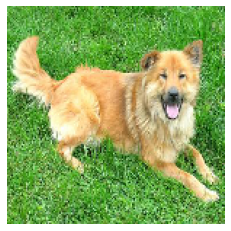

In [50]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# You can choose any iamge from testing , i had choose 4th 
test_image_path = 'dataset_dogs_vs_cats/testing/4.jpg'
test_image = load_img(test_image_path,color_mode='rgb',target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
plt.axis('off')
plt.imshow(test_image)

image = img_to_array(test_image)
image = image/255.0
image = np.expand_dims(image, axis=0)

## **Load trained model**

In [53]:
# load model
model = tf.keras.models.load_model('Cat_vs_Dog_image_classification.h5')

# predict the class
result = model.predict_classes(image)
print("[INFO] Predicting whether it's cat=0 or dog=1 ....")
print("Result :",result[0])

[INFO] Predicting whether it's cat=0 or dog=1 ....
Result : [1]


Prediction is right , it's a Dog

## **Feature visualization**





In [54]:
modal_layer = [layer.name for layer in model.layers]
print("Layer name : {}".format(modal_layer))

Layer name : ['conv2d', 'batch_normalization', 'max_pooling2d', 'dropout', 'conv2d_1', 'batch_normalization_1', 'max_pooling2d_1', 'dropout_1', 'conv2d_2', 'batch_normalization_2', 'max_pooling2d_2', 'dropout_2', 'conv2d_3', 'batch_normalization_3', 'max_pooling2d_3', 'dropout_3', 'flatten', 'dense', 'batch_normalization_4', 'dropout_4', 'dense_1']


In [0]:
from tensorflow.keras.models import Model

# model.input -> Just the input shape
# model.get_layer('conv2d').output -> would be the output of the 1st convolutional layer

conv2d_output = Model(inputs=model.input , outputs=model.get_layer('conv2d').output)
conv2d_1_output = Model(inputs=model.input , outputs=model.get_layer('conv2d_1').output)
conv2d_2_output = Model(inputs=model.input , outputs=model.get_layer('conv2d_2').output)
conv2d_3_output = Model(inputs=model.input , outputs=model.get_layer('conv2d_3').output)

In [56]:
conv2d_feature = conv2d_output.predict(image)
conv2d_1_feature = conv2d_1_output.predict(image)
conv2d_2_feature = conv2d_2_output.predict(image)
conv2d_3_feature = conv2d_3_output.predict(image)

print("First Convolution layer output shape : {} ".format(conv2d_feature.shape))
print("Second Convolution layer output shape : {} ".format(conv2d_1_feature.shape))
print("Third Convolution layer output shape : {} ".format(conv2d_2_feature.shape))
print("Fourth Convolution layer output shape : {} ".format(conv2d_3_feature.shape))

First Convolution layer output shape : (1, 148, 148, 32) 
Second Convolution layer output shape : (1, 72, 72, 64) 
Third Convolution layer output shape : (1, 34, 34, 128) 
Fourth Convolution layer output shape : (1, 15, 15, 256) 



### **`Single Convolution Filter Output`**

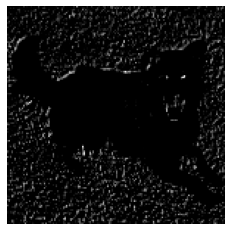

In [57]:
plt.imshow(conv2d_feature[0, :, :, 4], cmap='gray')
plt.axis('off')
plt.show()

### **`First Covolution Layer Output`**


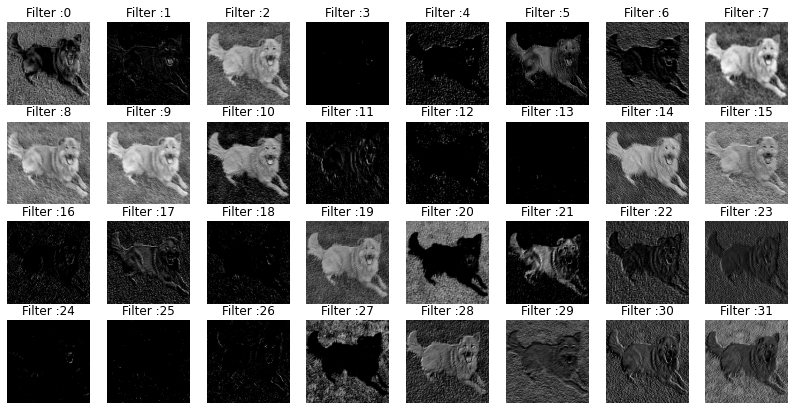

In [58]:
row = 4
col = 8

fig = plt.figure(figsize=(14,7))

for i in range(row*col):
  fig.add_subplot(row, col, i+1)
  plt.title('Filter :'+str(i))
  plt.axis('off')
  plt.imshow(conv2d_feature[0, :, :, i], cmap='gray')

plt.show()

### **`Second Covolution Layer Output`**

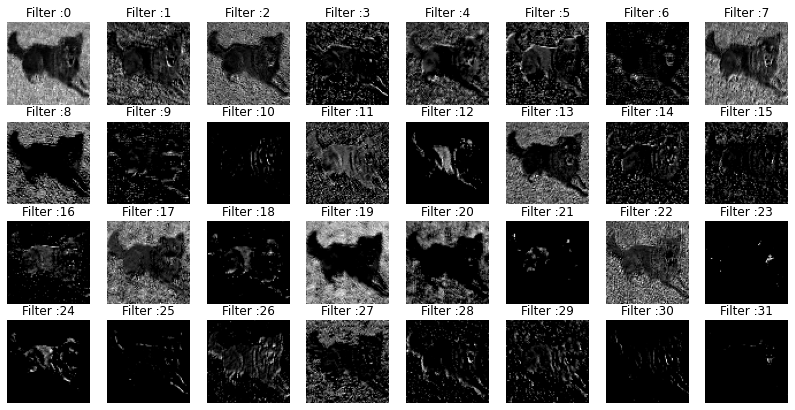

In [59]:
row = 4
col = 8

fig = plt.figure(figsize=(14,7))

for i in range(row*col):
  fig.add_subplot(row, col, i+1)
  plt.title('Filter :'+str(i))
  plt.axis('off')
  plt.imshow(conv2d_1_feature[0, :, :, i], cmap='gray')

plt.show()

### **`Third Covolution Layer Output`**

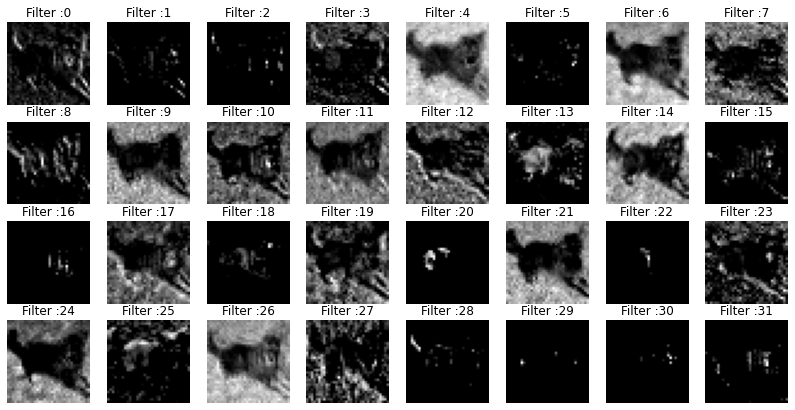

In [60]:
row = 4
col = 8

fig = plt.figure(figsize=(14,7))

for i in range(row*col):
  fig.add_subplot(row, col, i+1)
  plt.title('Filter :'+str(i))
  plt.axis('off')
  plt.imshow(conv2d_2_feature[0, :, :, i], cmap='gray')

plt.show()

### **`Fourth Covolution Layer Output`**

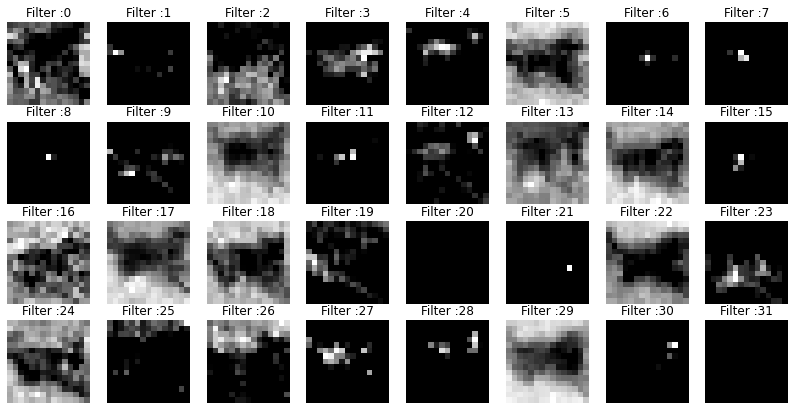

In [61]:
row = 4
col = 8

fig = plt.figure(figsize=(14,7))

for i in range(row*col):
  fig.add_subplot(row, col, i+1)
  plt.title('Filter :'+str(i))
  plt.axis('off')
  plt.imshow(conv2d_3_feature[0, :, :, i], cmap='gray')

plt.show()

##**Deploy model on colab**

Let’s now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [69]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

## NOTE : It only works for chrome not for firefox
'''
Reference : https://stackoverflow.com/questions/48760475/not-able-to-upload-local-files-in-google-collaboratory
'''

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving cat.14.jpg to cat.14.jpg
[0.]
cat.14.jpg is a cat


## **`Model performance on unseen data`** 

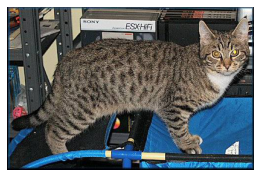

In [74]:
'''
 Keep running this block of code , you get different sample of images
'''

fig=plt.figure(figsize=(5, 3))
columns = 7
rows = 3

# index of selected random image from test dataset
test_indices = np.random.choice(np.arange(1, testing_image),size=(21,)) 

# Get the testing image using list comprehension
test_imagess = np.stack(([ test_filename[i] for i in test_indices ]))

s = load_img(testing_folder+'/'+test_imagess[0])
plt.axis('off')
plt.imshow(s)
plt.show()

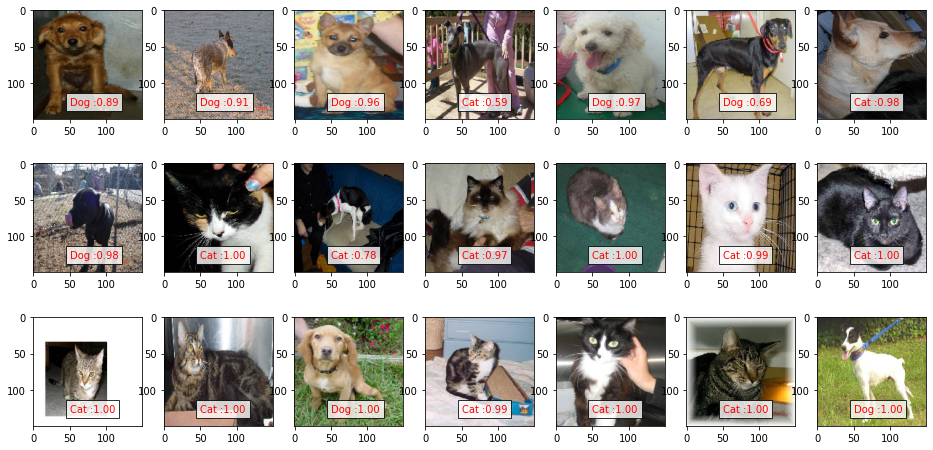

In [76]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(16, 8))
columns = 7
rows = 3

# index of selected random image from test dataset 
# rows * columns = 3 * 7 = 21 
test_indices = np.random.choice(np.arange(1, testing_image),size=(21,)) 

# Get the testing image using list comprehension
test_imagess = np.stack(([ test_filename[i] for i in test_indices ]))

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = load_img(testing_folder+'/'+test_imagess[i], target_size=(150, 150))
    img = img_to_array(img1)
    img = img/255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    # print(prediction)
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(50, 130,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(50, 130,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    
    plt.imshow(img1)

### **Prediction output** 

[[0.00111762]]

[[0.9332345]]

[[0.45254532]]

[[0.02002533]]

so it's kind of probability of predicting whether it's dog and cat.As in case of sigmoid function the value range between 0 to 1 , which indicate the probability of getting output y based on the input x.
So we have a thresold 0.5 if it's above 0.5 then classify as dog or else it will classify as cat.

so model learn in such way that whenever we feed a input as dog it will fire and give probability near to 1 and when it's cat the probability near to 0

`Question` : As on what basis it given label 0 to cat and 1 for dog ?

`Answer`:<br/>
Note: the subdirectories of images, one for each class, are loaded by the flow_from_directory() function in alphabetical order and assigned an integer for each class. The subdirectory “cat” comes before “dog“, therefore the class labels are assigned the integers: cat=0, dog=1. This can be changed via the “classes” argument in calling flow_from_directory() when training the model.


**References** :
* [https://medium.com/@komalaftab/build-cat-vs-dog-image-classifier-using-deep-learning-cnn-deployed-on-colab-146676d17b97](https://medium.com/@komalaftab/build-cat-vs-dog-image-classifier-using-deep-learning-cnn-deployed-on-colab-146676d17b97)

* [https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier](https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier)



## **Transfer learning** 



#### **Load pre-trained inception v3 model**

Now we can use these pretrained models which already know how to extract features and avoid the training from scratch. This concept is known as transfer learning.

<p align="center"/>
<img src="https://miro.medium.com/max/1400/1*aoNqrxNzIWnMe0-LdVQ_RQ.png" width="50%" />
</p>

The model is comprised of two main parts, the feature extractor part of the model that is convolutional layer with pooling and the classifier part of the model that is made up of fully connected layers and the output layer.

We can use the feature extraction part of the model and add a new classifier part of the model that is tailored to the dogs and cats dataset. Specifically, we can hold the weights of all of the convolutional layers fixed during training, and only train new fully connected layers that will learn to interpret the features extracted from the model and make a binary classification.

This can be achieved by loading the Inception-V3 model, removing the fully connected layers from the output-end of the model, then adding the new fully connected layers to interpret the model output and make a prediction. The classifier part of the model can be removed automatically by setting the “include_top” argument to “False“, which also requires that the shape of the input also be specified for the model, in this case (150,150, 3).


To use the pretrained weights we have to set the argument weights to imagenet. The default value is also set to imagenet. But if we want to train the model from scratch, we can set the weights argument to None. This will initialize the weights randomly in the network.

so are weights are set to None
because we are not using weight provided by imagenet, we are using loading weights provided
by google. 

Download from here : [inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjt5MTXvIHqAhWV63MBHUOFD8MQFjAAegQIARAB&url=https%3A%2F%2Fgithub.com%2Ffchollet%2Fdeep-learning-models%2Freleases%2Fdownload%2Fv0.5%2Finception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5&usg=AOvVaw2FpknTDaLHXGdvOXP1qmS-)



You need to take output of your last layer to and make it input to your final model. Something like this should work

Example :- 

```python

'''
 Syntax are similar and quitly used in functional api , we can do another way round 
'''
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 
```

References:

* [https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

* [https://stackoverflow.com/questions/57440297/how-to-use-inception-layer-in-transfer-learning](https://stackoverflow.com/questions/57440297/how-to-use-inception-layer-in-transfer-learning)


### Inception v3 architecture
<img src="https://miro.medium.com/max/1400/1*gqKM5V-uo2sMFFPDS84yJw.png" width="60%"/>

In [78]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(  
                                  input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS),
                                  include_top=False,
                                  weights = None
                                )

pre_trained_weight_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model.load_weights(pre_trained_weight_file)
'''
   Freezing layers
     Before training the network you may want to freeze some of its layers 
     depending upon the task. Once a layer is frozen, its weights are not 
     updated while training.

   whenever we set this parameter to false 
   it means we are not going to compute gradient 
   for this ,so weights are not going to update for pre-trained model
'''
pre_trained_model.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_99 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_99[0][0]     
_______________________________________________________________________________________

## **Extract part of pre-trained model**

In [81]:
# Extract a last layer of pre-trained model
# we could even extract any layer by specifying the layer name 

last_layer = pre_trained_model.get_layer('mixed10')
last_layer_output = last_layer.output

# Generate base model 
'''
  model.input -> Just the input shape
  output -> would be the output of mixed10 layer
'''
base_model = Model(inputs=pre_trained_model.input , outputs=last_layer_output)

# print summary
base_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_99 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_99[0][0]     
____________________________________________________________________________________________

## **Extract Base model with own custom layer**

In [82]:
# Initilize the model
extended_model = Sequential()

# Add base mode
extended_model.add(base_model)

# Add classifier part
# Flatten the result to feed into DNN (Deep neural network)
extended_model.add(Flatten())

# Add Dense layer (Fully connected layer )
extended_model.add(Dense(units=128, activation='relu'))
extended_model.add(BatchNormalization())
extended_model.add(Dropout(0.5))

# It contain only 1 output neuron , 0 for 'Cat' label and 1 for 'Dog' label
extended_model.add(Dense(units=1, activation='sigmoid'))

# Compile the extended_model 
# Specify the training configuration (optimizer, loss, metrics)

adam = tf.keras.optimizers.Adam(      learning_rate=0.001, 
                                        beta_1=0.9, 
                                        beta_2=0.999,
                                        epsilon=None,
                                        decay=0.0,
                                        amsgrad=False)

print("[INFO] Compiling extended_model ...")
extended_model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

# extended_model Summary
extended_model.summary()

[INFO] Compiling extended_model ...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_4 (Model)              (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2359424   
_________________________________________________________________
batch_normalization_193 (Bat (None, 128)               512       
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 24,162,849
Trainable params: 2,359,809
Non-trainable params: 21,803,04

Extended model callbacks

In [0]:
'''
Early Stop

To prevent over fitting we will stop the learning after 5 epochs and if val_loss value not decreased
'''
extended_earlystop = EarlyStopping(monitor='val_loss',patience=5)

In [0]:
extended_learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001
                                            ) 

In [0]:
filepath="cats_vs_dogs_extended_checkpoint_weights.best.hdf5"

extended_checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [0]:
callbacks = [extended_earlystop,extended_learning_rate_reduction,extended_checkpoint] 

We are choosing epoch = 5 , as their are lot of parameters to train. which take lot of time to train.

As it's very good model , as we can see that at epoch = 1 it giving accuracy around 90 % , if we train on more and more number of epoch it will reach at something around 95 to 98 % accuracy.

In [89]:
# initilize training config
# As it will bit long time for training   
epochs = 5

# Run training
print("[INFO] Training ...")

history = extended_model.fit(train_generator, steps_per_epoch=len(train_generator),
                    validation_data = validation_generator,
                    epochs=epochs,verbose=1,validation_steps = len(validation_generator),
                    callbacks=callbacks)

# save model
extended_model.save('Cat_vs_Dog_image_classification_extended_model.h5')

[INFO] Training ...
Epoch 1/5
147/147 [==============================] - ETA: 0s - loss: 0.1726 - accuracy: 0.9280
Epoch 00001: val_accuracy improved from -inf to 0.94130, saving model to cats_vs_dogs_extended_checkpoint_weights.best.hdf5
147/147 [==============================] - 1104s 8s/step - loss: 0.1726 - accuracy: 0.9280 - val_loss: 0.1497 - val_accuracy: 0.9413 - lr: 0.0010
Epoch 2/5
147/147 [==============================] - ETA: 0s - loss: 0.1561 - accuracy: 0.9329
Epoch 00002: val_accuracy improved from 0.94130 to 0.96557, saving model to cats_vs_dogs_extended_checkpoint_weights.best.hdf5
147/147 [==============================] - 1094s 7s/step - loss: 0.1561 - accuracy: 0.9329 - val_loss: 0.0873 - val_accuracy: 0.9656 - lr: 0.0010
Epoch 3/5
147/147 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 0.9347
Epoch 00003: val_accuracy improved from 0.96557 to 0.96748, saving model to cats_vs_dogs_extended_checkpoint_weights.best.hdf5
147/147 [================

### **Show accuracy on testing data**

In [90]:
'''
The evaluate_model() function below implements these behaviors,
taking the training dataset as arguments and returning a list of
accuracy scores and training histories that can be later summarized.

'''
print("[INFO] Evaluating ... ")
(loss,accuracy) = extended_model.evaluate(validation_generator,steps=len(validation_generator),verbose=1)
print("[INFO] accuracy : {:.2f}%".format(accuracy*100))

[INFO] Evaluating ... 
50/50 [==============================] - 252s 5s/step - loss: 0.0867 - accuracy: 0.9651
[INFO] accuracy : 96.51%


In [0]:
## Save the weight

'''
Here we are storing both model and weights
'''

extended_model.save_weights("Extended_model_weights/cat_vs_dog_weights.temp.hd5",overwrite=True)


### **Model performance using transfer learning**

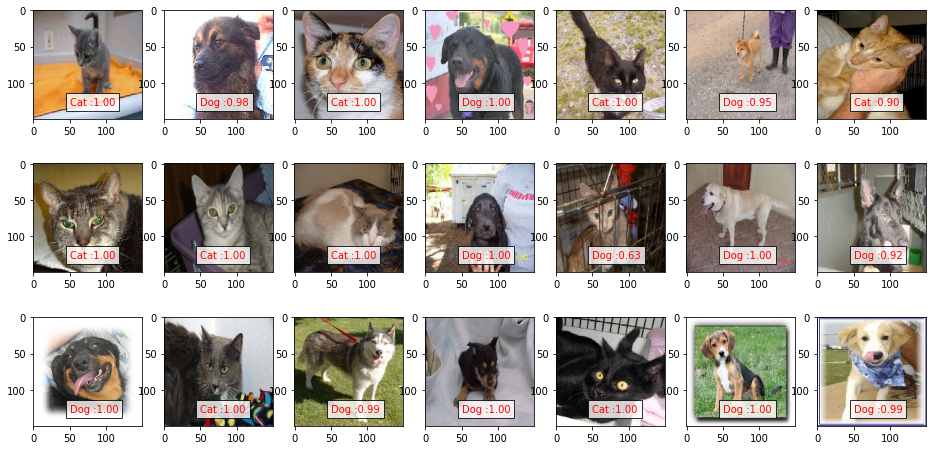

In [93]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig = plt.figure(figsize=(16, 8))
columns = 7
rows = 3

# index of selected random image from test dataset 
# rows * columns = 3 * 7 = 21 
test_indices = np.random.choice(np.arange(1, testing_image),size=(21,)) 

# Get the testing image using list comprehension
test_imagess = np.stack(([ test_filename[i] for i in test_indices ]))

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = load_img(testing_folder+'/'+test_imagess[i], target_size=(150, 150))
    img = img_to_array(img1)
    img = img/255.0
    img = np.expand_dims(img, axis=0)
    prediction = extended_model.predict(img, batch_size=None,steps=1) #gives all class prob.
    # print(prediction)
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(50, 130,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(50, 130,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    
    plt.imshow(img1)

In [95]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

## NOTE : It only works for chrome not for firefox
'''
Reference : https://stackoverflow.com/questions/48760475/not-able-to-upload-local-files-in-google-collaboratory
'''

'''
Selected image from testing dataset
'''

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = extended_model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 35.jpg to 35.jpg
[1.8833013e-11]
35.jpg is a cat


In [98]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

## NOTE : It only works for chrome not for firefox
'''
Reference : https://stackoverflow.com/questions/48760475/not-able-to-upload-local-files-in-google-collaboratory
'''

'''
Selected image from testing dataset
'''

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = extended_model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 216.jpg to 216.jpg
[1.]
216.jpg is a dog


Download Resource From Here : [Cat_vs_Dog_Resource_link](https://drive.google.com/drive/folders/1_VJWFtv_uthZoFQpfckif5rBhav_0skh?usp=sharing) 

